In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [42]:
testSize = 0.25 #percentage of total set
k = 5 # for K-fold cross-validation
linear = LogisticRegression()
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier()
models = [#('Linear',linear,RFE(linear)),
          #('Gradient Boosting', GBC, SelectFromModel(GBC)),
          ('Random Forests',RFC,SelectFromModel(RFC)),
         ('Decision tree',DTC,SelectFromModel(DTC)),
         ('Adaboost',ABC,SelectFromModel(ABC))]

In [43]:
X = pd.read_csv("../multiclass/X.csv",header=None).values
y = pd.read_csv("../multiclass/y.csv",header=None,squeeze=True).values
waveLengths = pd.read_csv("../multiclass/Wavelength.csv",header=None)
X_toClassify = pd.read_csv("../multiclass/XtoClassify.csv",header=None).values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
results = pd.DataFrame(columns=['Algorithm',
                                'mean score',
                                'total operation time',
                                'Number of important features',
                                "mean score on reduced feature set",
                                "total operation timeon reduced feature set", 
                                "Best feature"])
# print(results)
X_train.shape
bestModel = []

In [44]:
results = pd.DataFrame(columns=['Algorithm',
                                'mean score',
                                'total operation time',
                                'Number of important features',
                                "mean score on reduced feature set",
                                "total operation timeon reduced feature set", 
                                "Best feature"])

for name, model, selector in models:
    scores = cross_validate(model,X_train,y_train,cv=k,scoring='f1_micro')
    selector.fit(X_train,y_train)
    X_reduced = selector.transform(X_train)
    scores_reduced = cross_validate(model,X_reduced,y_train,cv=k,scoring='f1_micro')
    model.fit(X_train,y_train)
    results.loc[len(results)] = pd.Series({
        'Algorithm' : name,
        "mean score":scores['test_score'].mean(),
        "total operation time" : sum(scores['fit_time'])+sum(scores['score_time']),
        "Number of important features":sum(selector.get_support()),
        "mean score on reduced feature set":scores_reduced['test_score'].mean(),
        "total operation timeon reduced feature set" : sum(scores_reduced['fit_time'])+sum(scores_reduced['score_time']),
        "Best feature" : np.argmax(model.feature_importances_)
    })
results
results['rating'] = results['mean score on reduced feature set'] * 1/results['total operation timeon reduced feature set']
results.sort_values('rating',ascending=False,inplace=True)
bestModelRecord = results.iloc[0]

In [45]:
bestModel

[]

In [46]:
for name,model,selector in models:
    if name == bestModelRecord['Algorithm']:
        bestModel = model
        bestSelector = selector
        
bestModel.fit(bestSelector.fit_transform(X_train,y_train),y_train)
f1_score(bestModel.predict(bestSelector.transform(X_test)),y_test,average='micro')

0.96460176991150437

In [47]:
pd.DataFrame(bestModel.predict(bestSelector.transform(X_toClassify))).to_csv("../multiclass/PredictedClasses.csv",index=False)

In [49]:
print('total number of features: ', X.shape[1])


RFSelector = SelectFromModel(RF,'mean')
RF.fit(X_train,y_train)
RFSelector.fit(X_train,y_train)

# which features perform well enough to keep?
print(waveLengths[RFSelector.get_support()])


total number of features:  921
           0
199  495.126
264  519.073
281  525.310
293  529.705
382  562.129
632  651.467
670  664.811
874  735.317
880  737.361
882  738.042


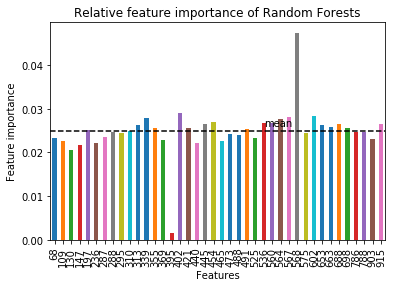

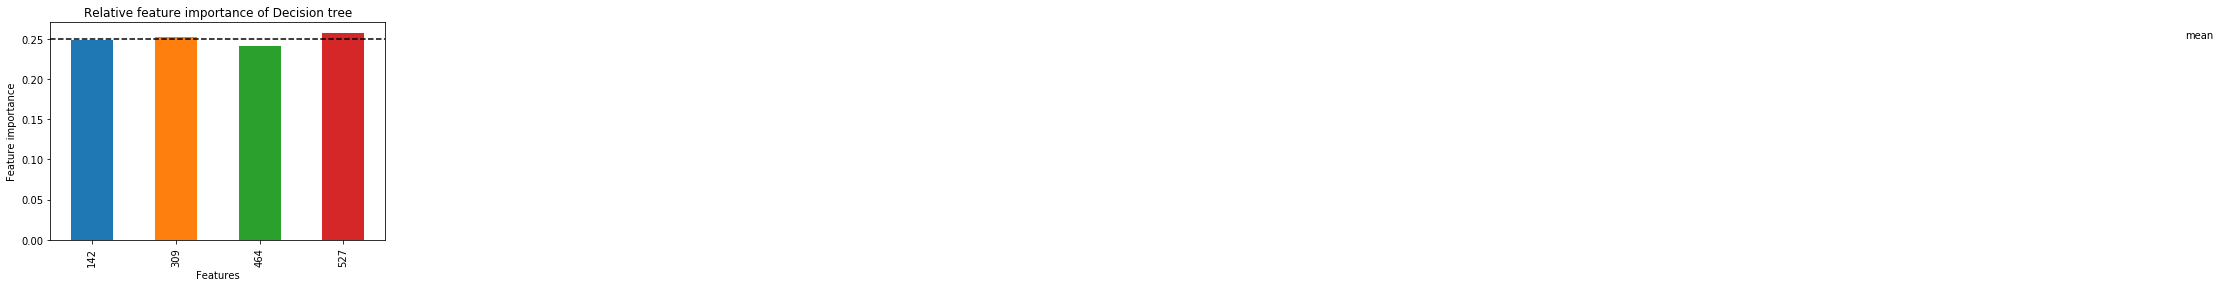

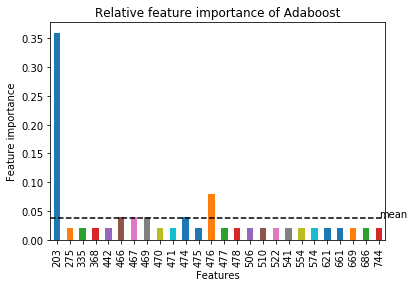

In [14]:
for name, model, selector in models:
    featImp = pd.Series(model.feature_importances_)
    feats = featImp[featImp>featImp.mean()]
    feats.plot(kind='bar')
    # plt.bar(feats.index,feats)
    plt.axhline(y= feats.mean(), hold=None, ls="dashed", color="black")
    plt.text(x=25,y=feats.mean()+0.001, s="mean", color="black")
    plt.title("Relative feature importance of " + name)
    plt.xlabel("Features")
    plt.ylabel("Feature importance")
    plt.show()

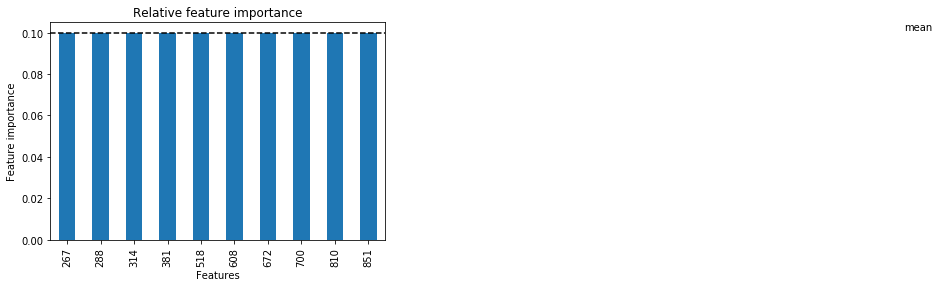

In [70]:
featImp = pd.Series(RF.feature_importances_)
feats = featImp[featImp>featImp.mean()]
feats.plot(kind='bar')
# plt.bar(feats.index,feats)
plt.axhline(y= feats.mean(), hold=None, ls="dashed", color="black")
plt.text(x=25,y=feats.mean()+0.001, s="mean", color="black")
plt.title("Relative feature importance")
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.show()